# Support vector machine (soft margin)

In the hard margin case, we assumed that the data is linearly separable. In practice, however, most classification data set is not linearly separable. This means that the optimization problem would not have a solution. In the soft margin case, we allow the model to have some degree of error. Instead of solving the hard-margin optimization problem

$$\min_{w,b} \frac{1}{2}||w||_2^2 \hspace{5mm} \text{subject to} \; y_i(w^Tx_i+b)\geq 1$$

We consider solving

$$\min_{w,b,\xi} \frac{1}{2}||w||_2^2 + C\sum_{i=1}^n \xi_i \hspace{5mm} \text{subject to} \; y_i(w^Tx_i+b)\geq 1-\xi_i, \xi_i\geq 0$$

Where $\xi_i$ denote the levels of error on the $i$th data. The hyperparameter $C$ controls the amount of error we tolerate.
* If $C$ is small, then we don't care about the error.
* If $C$ is large, then we can't tolerate lots of errors. 

Like before, we can instead solve the dual problem. Define Lagrangian 

$$ \mathcal{L}(w, b, \xi, \lambda, \mu) =  \frac{1}{2}||w||_2^2 + C\sum_{i=1}^n \xi_i + \sum_{i=1}^n \lambda_i (1-\xi_i -y_i(w^Tx_i+b)) - \sum_{i=1}^n \mu_i\xi_i$$

The derivation of the dual problem is exactly the same as in the case of hard margin, except that in the stationary condition for KKT, we need to include

$$\nabla_{\xi_i}\mathcal{L}=C-\alpha_i-\mu_i=0$$

This suggests that $\alpha_i\leq C$. Therefore, the dual problem is given by 

$$\max_{0\leq \alpha\leq C}\sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n \alpha_i\alpha_jy_iy_jx_i^Tx_j$$

Which can again be solved using quadratic programming methods

For soft margin SVM, it turns out that we can solve it using gradient descent instead. Note that we can rewrite the optimization problem as 

$$\min_{w,b} \frac{1}{2}||w||_2^2 + C\sum_{i=1}^n (1-y_i(w^Tx_i+b))_+ $$

Where we moved the linear constraints into the objective, and $z_+=\max\{0, z\}$ denote hinge loss. To solve for $w, b$ we can then perform gradient descent on the objective function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
class supportVectorMachineSoftMargin:
    
    def __init__(self, D, C):
        self.w = np.random.randn(D)
        self.b = np.random.randn()
        self.C = C

    def fit(self, X, y, maxIter=100, lr=1e-3):
        i = 0
        while i <= maxIter:
            dw, db = self.gradient(X, y)
            self.w -= lr * dw
            self.b -= lr * db
            i += 1
            
    def predict(self, X, y):
        prod = np.dot(X, self.b) + self.w
        y = np.where(prod > 0, 1, -1)
        return y
            
    def gradient(self, X, y):
        distances = 1 - y * (np.dot(X, self.w) + self.b)
        dw = np.zeros(len(self.w))
        db = 0
        for i, d in enumerate(distances):
            if d > 0:
                dw += -y[i] * X[i]
                db += -y[i]
        dw = self.w + self.C * dw / len(y)
        db = self.C * db / len(y)
        return dw, db

In [33]:
x1 = np.random.multivariate_normal([0.7, 0.8], np.diag([0.5, 0.3]), 30)
x2 = np.random.multivariate_normal([-0.8, -0.7], np.diag([0.3, 0.5]), 30)
y1 = np.ones(30) 
y2 = -np.ones(30)
X = np.vstack((x1, x2))
y = np.concatenate((y1, y2))
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

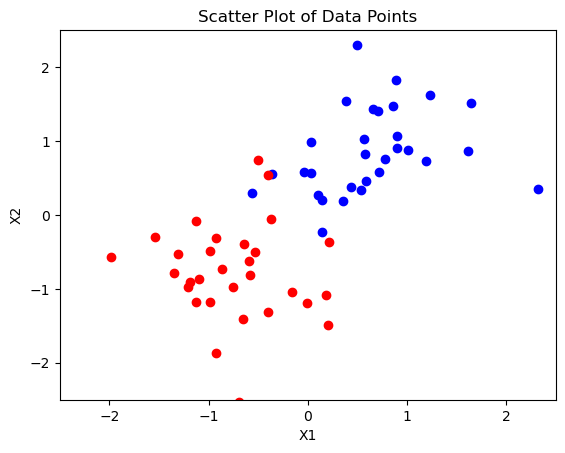

In [34]:
plt.scatter(x1[:, 0], x1[:, 1], color='blue')
plt.scatter(x2[:, 0], x2[:, 1], color='red')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Data Points')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()

In [38]:
svm = supportVectorMachineSoftMargin(2, 1)

In [47]:
svm.fit(X, y, maxIter=500)

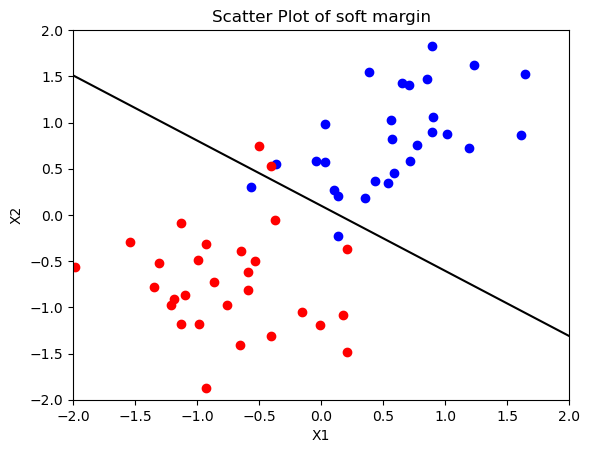

In [48]:
plt.scatter(x1[:, 0], x1[:, 1], color='blue')
plt.scatter(x2[:, 0], x2[:, 1], color='red')
x_line = np.linspace(-2, 2, 100)
plt.plot(x_line, svm.b -svm.w[0] * x_line / svm.w[1], color='black', label='y=x')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of soft margin')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()